# Polygon Triangulation Problem
-----

In [26]:
from shapely.geometry import Point, Polygon
from matplotlib import pyplot as plt
from typing import List
from math import sqrt

import random

class polygon:
    def __init__(self, n):
        self.poly  = Polygon()
        self.sides = n
        self.range = 50

        if(n*10 > self.range):
            self.range = n*10
    
    def generate(self):
        random.SystemRandom()
        x = random.sample(range(-self.range, self.range), self.sides)
        y = random.sample(range(-self.range, self.range), self.sides)
        z = list(zip(x,y))
        self.poly = Polygon(z)
        self.poly = self.poly.convex_hull
        n = len(self.poly.exterior.xy[0])-1
        while n <self.sides:
            random.SystemRandom()
            x, y   = (random.randint(-self.range, self.range),
                      random.randint(-self.range, self.range))

            x1, y1 = self.poly.exterior.xy

            x1.append(x)
            y1.append(y)
            z = list(zip(x1, y1))
            self.poly = Polygon(z)
            self.poly = self.poly.convex_hull
            n = len(self.poly.exterior.xy[0])-1
      
    def plot(self):
        x, y = self.poly.exterior.xy
        plt.plot(x, y)
        plt.show()

    def getsides(self):
        return self.sides

In [27]:
def dist(p1, p2):
    return sqrt((p1[0] - p2[0])*(p1[0] - p2[0]) + (p1[1] - p2[1])*(p1[1] - p2[1]))

def cost(vertices, x, y, z):

    distance = dist(vertices[x],vertices[y])+dist(vertices[y],vertices[z])+dist(vertices[z],vertices[x])
    return distance

### Brute Force Approach

In [28]:
def poly_cost(P:Polygon, i, j, k):
    p1 = Point(P.exterior.coords[i])
    p2 = Point(P.exterior.coords[j])
    p3 = Point(P.exterior.coords[k])

    dist = p1.distance(p2) + p2.distance(p3) + p3.distance(p1)
    return dist

def brute_force_MWT(P:Polygon, i, j):  
    
    if(j < i+2):
        return 0

    res = 9999999999
    for k in range (i+1, j):
        minimum = brute_force_MWT(P, i, k) + brute_force_MWT(P, k, j) + poly_cost(P, i, k, j)
        if minimum <= res:
            res = minimum

    return round(res,4)

### Dynamic Programming Approach

In [29]:
def dynam_progr_MWT(vertices):
    n = len(vertices)

    T = [[0.0]*n for _ in range(n)]
    for diagonal in range(n):
        i = 0
        for j in range(diagonal, n):
            if j >= i + 2:
                T[i][j] = sys.maxsize
                for k in range(i+1, j):
                    weight  = dist(vertices[i], vertices[j]) +\
                              dist(vertices[j], vertices[k]) +\
                              dist(vertices[k], vertices[i])

                    T[i][j] = min(T[i][j], weight+T[i][k]+T[k][j])
            i+=1

    return T[0][-1]

### Greedy Programming Approach

In [30]:
import math
def position(arr):
    convex = max(arr, key = lambda x: (x[1], x[0]))
    for i in range(len(arr)):
        if arr[i] == convex:
            return i

def inwards(x,y,z):
    angle = math.degrees(math.atan2((z[1]-y[1]),(z[0]-y[0]))-math.atan2((z[1]-y[1]),(z[0]-y[0])))
    if angle >= 180:
        return False
    else:
        return True
        
def inList(x,y,z):
    if   x in y:
        return 1
    elif x in z:
        return 2

def perimeter(x,y,z):
    return (dist(x,y)+dist(y,z)+dist(z,x))

In [55]:
def greed_progr_MWT(vertices):

    n   = len(vertices)
    div = position(vertices)+1

    L   = vertices[:div]
    R   = vertices[div:]
    print(L)
    print(R)
    vertices_merged = L+R
    vertices_merged = sorted(vertices_merged, key = lambda k: (k[1],k[0]), reverse=True)
    print(vertices_merged)

    L   = set(L)
    R   = set(R)
    results = []

    q = []
    q.append(vertices_merged[0])
    q.append(vertices_merged[1])

    last = 1
    for i in range(2,n-1):
        if inList(vertices_merged[i],L,R) == inList(vertices_merged[last],L,R):
            q.append(vertices_merged[i])
            last = i
            
            if(inwards(q[0],q[1],q[2])==True and len(q)>2):
                p1 = Point(q[0])
                p2 = Point(q[1])
                p3 = Point(q[2])
                temp_cost = p1.distance(p2)+p2.distance(p3)+p3.distance(p1)
                results.append(temp_cost)
                q.remove(q[1])
        else:
            temp = q[0]
            q.remove(q[0])

            while(len(q) >= 2):
                p1 = Point(q[0])
                p2 = Point(q[1])
                p3 = Point(vertices_merged[i])
                temp_cost = p1.distance(p2)+p2.distance(p3)+p3.distance(p1)
                results.append(temp_cost)
                q.remove(q[1])
            p1 = Point(temp)
            p2 = Point(q[0])
            p3 = Point(vertices_merged[i])
            temp_cost = p1.distance(p2)+p2.distance(p3)+p3.distance(p1)
            results.append(temp_cost)
            print(results)
            q.append(vertices_merged[i])
            last = i

    temp_cost = perimeter(vertices_merged[n-1],vertices_merged[n-2],vertices_merged[n-3])
    results.append(temp_cost)
    
    results = sorted(results, key=lambda x: x)
    print(results)
    return results[0]

SyntaxError: invalid syntax (1875329200.py, line 41)

## .../testing

15.30056307974577
[(0, 0), (2, 0), (2, 1), (1, 2)]
[(0, 1)]
[(1, 2), (2, 1), (0, 1), (2, 0), (0, 0)]
(1, 2)
[(2, 1)]
POINT (2 1)
POINT (2 1)
1.4142135623730951
2
0.0
[2.8284271247461903]
[2.8284271247461903, 2.8284271247461903, 4.82842712474619]
2.8284271247461903


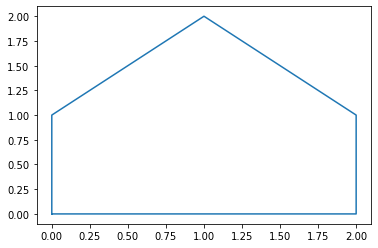

In [56]:
pol = polygon(5)
pol.poly = Polygon([(0, 0), (2, 0), (2, 1), (1,2), (0, 1)])
vx = [(0, 0), (2, 0), (2, 1), (1, 2), (0, 1)]
#print(brute_force_MWT(pol,0,5))
print(dynam_progr_MWT(vx))
print(greed_progr_MWT(vx))
pol.plot()